In [2]:
import pandas
import pyodbc
import matplotlib.pyplot as plt
from talib import abstract


In [3]:
server = "ey-finance.database.windows.net"
database = "finance"
username = "我的帳號"
password = "我的密碼"
driver = "{ODBC Driver 17 for SQL Server}"

conn = pyodbc.connect(f"DRIVER={driver};SERVER={server};PORT=1433;DATABASE={database};UID={username};PWD={password}")
symbol = "2330"
cursor= conn.cursor()

query = f"SELECT TradeDate, OpenPrice, ClosePrice, HighPrice, LowPrice FROM [dbo].[DailyPrice] WHERE Symbol ='{symbol}' ORDER BY TradeDate;"
df = pandas.read_sql(query, conn, index_col="TradeDate", parse_dates="TradeDate")
df

,OpenPrice,ClosePrice,HighPrice,LowPrice
TradeDate,,,,
2010-01-04,65.0,64.9,65.0,64.0
2010-01-05,65.0,64.5,65.1,63.9
2010-01-06,64.5,64.9,64.9,63.7
2010-01-07,64.9,64.2,65.0,64.2
2010-01-08,63.5,64.0,64.3,63.5
...,...,...,...,...
2020-09-22,440.0,437.0,441.0,436.0
2020-09-23,436.0,433.5,438.5,432.0
2020-09-24,425.5,423.0,429.0,423.0


In [4]:
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pandas.DataFrame(talib_output).transpose()
    else:
        ret = pandas.Series(talib_output)
    ret.index = tsmc['close'].index
    return ret;


In [5]:
# 取得各欄位的新dataframe
for k, d in df.items():
    if k == "ClosePrice":
        close = d # Dataframe.transpose() 這是倒轉
        close.index = pandas.to_datetime(close.index)
    elif k == "OpenPrice":
        open = d
        open.index = pandas.to_datetime(open.index)
    elif k == "HighPrice":
        high = d
        high.index = pandas.to_datetime(high.index)
    elif k == "LowPrice":
        low = d
        low.index = pandas.to_datetime(low.index)

# print(close)
# print(open)
# print(high)
# print(low)

TradeDate
2010-01-04     64.9
2010-01-05     64.5
2010-01-06     64.9
2010-01-07     64.2
2010-01-08     64.0
              ...  
2020-09-22    437.0
2020-09-23    433.5
2020-09-24    423.0
2020-09-25    424.0
2020-09-28    431.5
Name: ClosePrice, Length: 2645, dtype: float64


&lt;AxesSubplot:xlabel=&#39;TradeDate&#39;&gt;

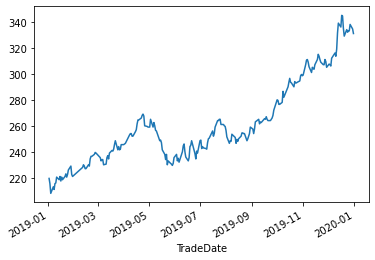

In [6]:
# 做成dictionary
tsmc = {
    'close':close.dropna().astype(float),
    'open':open.dropna().astype(float),
    'high':high.dropna().astype(float),
    'low':low.dropna().astype(float)
}

print(tsmc["close"])
tsmc['close']["2019"].plot() #檢查結果

&lt;AxesSubplot:label=&#39;427ae570-b33f-4a7d-a694-ff27f91493a7&#39;&gt;

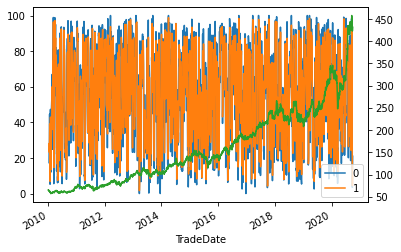

In [7]:
kd_value = abstract.STOCH(tsmc)
talib2df(kd_value).plot()
tsmc['close'].plot(secondary_y=True)